<8일 간 일정>

Keras 활용 (Tensorflow는 8일 안에 하기 빠듯하다)

1. CNN / Relu : 2일
2. 전이학습 (객체 인식) : 2일
3. 객체검출 : 2일
4. 감정학습 : 2일

# <오늘 할 것>

## 1. 딥러닝 기초잡기

## 2. keras 기초
- 2-1. 모델 만들어보기: 단층/ 다층
- 2-2. 결정경계면으로 시각화
- 2-3. 모델 갖고 놀기
    - 2-3-1. 층 늘리기
    - 2-3-2. 뉴런 수 늘리기
    - 2-3-3. 다른 데이터로 또 해보기
- **학습이 잘 되고 있는지 확인하기**
- 2-4. 활성화 함수
    - LeakyReLU

## 3. 경사하강법

## 1. 딥러닝 기초잡기
1. 기계학습과 딥러닝의 차이점은?
    - AI > 기계학습 > 딥러닝
        - 주어진 데이터를 이용해서 학습/예측 모델링을 한다는 것은 동일
        - 방정식(y = ax + b)을 기초로 한다는 것도 동일
        - 둘의 분기점은 딥러닝은 **반복적인 최적화**를 수행한다는 것이다.
            - == **경사하강법**
            - & 다층네트워크; 이를 통해 구축한 층을 켜켜이 쌓아올림
    - 딥러닝은 되게 협소한 분야다
    - 신경망을 활용한 학습


2. 경사하강법을 그림으로 표현하면?

<img src='gradient_descent.jpg'>

3. 가중치는 신경망의 어디에 해당하는가?
    - 생물학적 신경망의 어디에 해당하는가하는 질문이었음
    - 가중치 == 시냅스를 통해 전달되는 신경전달물질의 양
        - 다음 뉴런으로 신호가 전달되느냐/전달되지 않느냐의 차이를 발생시키기 때문


4. 어떻게 다층으로 복잡한 문제를 풀 수 있는가?


5. 다층네트웍을 학습시키기가 어려운 이유는?
    - 다층네트웍을 구축한다는 장점에는
    - 실행 속도가 느리다는 단점이 따라온다.
    
6. 활성화는 비선형이어야하는가?


7. sigmoid 함수의 장점은?


8. y = wx + b에서 b는 왜 필요한가?
    - bias
    - 정규화 과정이 없다면 굉장히 중요한 역할
        - b가 없다면 원점을 반드시 지나는 직선을 찾아야하기 때문


9. 딥러닝의 핵심돌파구는?
    - 모델이 깊어지면 깊어질수록(레이어를 추가할수록) 성능이 좋아져야하는데 그렇지 않음
        - 층마다 학습이 되는 층이 있고, 학습이 되지 않는 층이 있기 때문
            - 출력층에서 멀어질수록 학습이 잘 이루어지지 않음
            - 역전파 방식으로 오류를 수정하기 때문에 출력층에 가까울수록 학습이 잘 됨
    - 돌파구: 새로운 활성화 함수
        - sigmoid --> relu / LeakyReLU


10. 왜 CNN을 특징추출과 분류기결합으로 보는가?



In [ ]:
# 역행렬을 이용한 최적해 구하기

# 행렬로 만들어야 빨리 계산할 수 있다

In [1]:
import numpy as np
import numpy.linalg as lin

In [4]:
a = np.array([[1, 1], [2, 1]])
print(a)
print(a.shape)

# `inv`메소드로 역행렬을 구할 수 있다.
a_ = lin.inv(a)
print(a_)
print(a_.shape)

[[1 1]
 [2 1]]
(2, 2)
[[-1.  1.]
 [ 2. -1.]]
(2, 2)


In [9]:
y = np.array([2, 4])
print(y)

[2 4]


In [8]:
w = a_ * y
print(w)

[[-2.  4.]
 [ 4. -4.]]


원하는 형태가 아니다. 2x1이 나왔어야 했는데 2x2가 나왔다.

--> 브로드캐스팅되었기 때문

In [11]:
#`matmul`메소드를 활용해서 
w = np.matmul(a_, y)
print(w)

[2. 0.]


In [17]:
y = np.array([2, 4])   #
print(y)
print(y.shape)

y_1 = np.array([[2, 4]])   #로우 벡터
print(y_1)
print(y_1.shape)

y_2 = np.array([[2], [4]])   #칼럼 벡터
print(y_2)
print(y_2.shape)

#`reshape`메소드를 쓰면 쉽게 칼럼 벡터로 바꿀 수 있다.
y = np.array([2, 4]).reshape(2, 1)
print(y)
print(y.shape)

print('------------------------------------------')

w = np.matmul(a_, y)
print(w)

[2 4]
(2,)
[[2 4]]
(1, 2)
[[2]
 [4]]
(2, 1)
[[2]
 [4]]
(2, 1)
------------------------------------------
[[2.]
 [0.]]


In [29]:
#3개짜리도 해보자
a = np.array([[1, 1], [2, 1], [3, 1]])

a_ = lin.pinv(a)    #정방행렬이 아닐 때는 역행렬을 구할 때 `pinv` 메소드를 쓴다.

print(a)
print(a_)

[[1 1]
 [2 1]
 [3 1]]
[[-5.00000000e-01 -3.19189120e-16  5.00000000e-01]
 [ 1.33333333e+00  3.33333333e-01 -6.66666667e-01]]


In [20]:
y = np.array([2, 4, 6.4]).reshape(3, 1)
w = np.matmul(a_, y)
print(w)

[[ 2.2       ]
 [-0.26666667]]


### x가 1일 때 y 예측값을 어떻게 구할 수 있을까?

In [28]:
#y = wx + b
y = w[0][0] * 1 + w[1][0]
print(y)

1.9333333333333322


불편하다.

--> 다 행렬로 바꾸어주면 편하다.

In [27]:
np.matmul(w, np.array([1, 1]))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

## 2. keras 기본

Keras 를 사용하면 다음과 같은 순서로 신경망을 구성할 수 있다.

1. Sequential 모형 클래스 객체 생성


2. add 메서드로 레이어 추가.
    - 입력단부터 순차적으로 추가한다.
    - 레이어는 출력 뉴런 갯수를 첫번째 인수로 받는다.
    - 최초의 레이어는 input_dim 인수로 입력 크기를 설정해야 한다.
    

3. activation 인수로 활성화함수 설정


4. compile 메서드로 모형 완성.
    - loss인수로 비용함수 설정
    - optimizer 인수로 최적화 알고리즘 설정
    - metrics 인수로 트레이닝 단계에서 기록할 성능 기준 설정
    

5. fit 메서드로 트레이닝
    - nb_epoch 로 에포크(epoch) 횟수 설정
    - batch_size 로 배치크기(batch size) 설정
    - verbose는 학습 중 출력되는 문구를 설정하는 것으로, 주피터노트북(Jupyter Notebook)을 사용할 때는 verbose=2로 설정하여 진행 막대(progress bar)가 나오지 않도록 설정한다.; 0은 안 보이기, 1은 다 보이기

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.callbacks import LambdaCallback    
from keras.callbacks import EarlyStopping     
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 2-1. 모델 만들어보기: 단층 / 다층

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [3]:
#단층으로 쌓아보자
model = Sequential()    #Sequential: 이전층의 output을 input으로 활용하겠다는 뜻; 따라서 두번째 층부터는 input_dim을 명시해주지 않아도 된다.
model.add(Dense(1, input_dim = 2, activation = 'sigmoid'))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [4]:
#다층
model = Sequential()
model.add(Dense(5, input_dim = 2))    #hidden layer
model.add(Activation('sigmoid'))

model.add(Dense(1))                   #output layer
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


파라미터가 왜 15, 6개인지 알아야한다.
- 첫번째 층(hidden layer): (가중치 2개 + 바이어스 1개) * 신경망 5개 = 15개
- 두번째 층(output layer): 전층 출력값 5개 + 이번 층 출력값 1개 = 6개

In [5]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [6]:
model.fit(X, y, batch_size=4, epochs=2000, verbose=0)
# batch_size 몇개의 샘플로 가중치를 갱신할 것인지
# epochs 학습을 반복할 횟수(전체 데이터를 활용한 계산 횟수)
print(model.predict_proba(X))    #predict_proba 각 클래스에 대한 확률을 리턴하는 메소드

[[0.15709838]
 [0.66853356]
 [0.8139171 ]
 [0.34099388]]


하나도 안 정확하다

In [7]:
p = model.predict(X)
print(p > 0.5)    #True/False 값 리턴
print((p > 0.5) * 1)

[[False]
 [ True]
 [ True]
 [False]]
[[0]
 [1]
 [1]
 [0]]


In [8]:
# 은닉층 신경망 개수를 줄여본다
model = Sequential()
model.add(Dense(2, input_dim = 2))    #hidden layer 2개
model.add(Activation('sigmoid'))

model.add(Dense(1))                   #output layer
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

model.fit(X, y, batch_size=4, epochs=3000, verbose=0)   # 3000번 실행
# batch_size 몇개의 샘플로 가중치를 갱신할 것인지; 클수록 계산량이 많기 때문에 속도가 느려진다.
# epochs 학습을 반복할 횟수(전체 데이터를 활용한 계산 횟수)
print(model.predict(X))    #predict_proba 각 클래스에 대한 확률을 리턴하는 메소드

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
activation_4 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
[[0.29569972]
 [0.6137472 ]
 [0.56182605]
 [0.2804164 ]]


결과가 제대로 안 나왔을 때 확인할 수 있는 방법?

## 경사하강법 Gradient Descent
경사하강법은 전체 데이터의 미분값의 평균으로 최적화를 수행한다.

**확률적 경사하강법(Stochastic~, SGD)**은 전체 데이터가 아니라 batch_size의 샘플을 가지고만 가중치를 갱신한다. --> smoothing effect

## 2-2. 결정경계면으로 시각화

(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


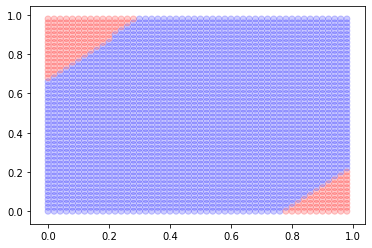

In [9]:
#분류 결과 시각화: 결정경계면 그리기 --> 2차원만 가능
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

In [10]:
# 은닉층 뉴런 개수를 늘려본다
model = Sequential()
model.add(Dense(10, input_dim = 2))    #hidden layer 뉴런 10개
model.add(Activation('sigmoid'))

model.add(Dense(1))                   #output layer
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

model.fit(X, y, batch_size=4, epochs=3000, verbose=0)   # 3000번 실행
# batch_size 몇개의 샘플로 가중치를 갱신할 것인지; 클수록 계산량이 많기 때문에 속도가 느려진다.
# epochs 학습을 반복할 횟수(전체 데이터를 활용한 계산 횟수)
print(model.predict(X))    #predict_proba 각 클래스에 대한 확률을 리턴하는 메소드

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
_________________________________________________________________
activation_7 (Activation)    (None, 1)                 0         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
[[0.03180749]
 [0.9177886 ]
 [0.9389765 ]
 [0.09608308]]


(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


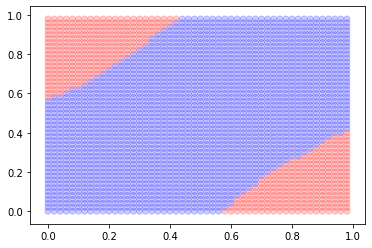

In [11]:
#분류 결과 시각화
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

In [25]:
# 은닉층 개수를 늘려본다.
model = Sequential()
model.add(Dense(10, input_dim = 2))    #hidden layer1 뉴런 10개; 딱히 규칙은 없지만 층을 지날수록 뉴런 수를 줄여나가는 것이 일반적
model.add(Activation('sigmoid'))

model.add(Dense(5))    #hidden layer2 뉴런 5개
model.add(Activation('sigmoid'))

model.add(Dense(3))    #hidden layer3 뉴런 3개
model.add(Activation('sigmoid'))

model.add(Dense(1))    #output layer
model.add(Activation('sigmoid'))


model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

model.fit(X, y, batch_size=4, epochs=3000, verbose=0)   # 3000번 실행
# batch_size 몇개의 샘플로 가중치를 갱신할 것인지; 클수록 계산량이 많기 때문에 속도가 느려진다.
# epochs 학습을 반복할 횟수(전체 데이터를 활용한 계산 횟수)
print(model.predict(X))    #predict_proba 각 클래스에 대한 확률을 리턴하는 메소드

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 55        
_________________________________________________________________
activation_25 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 18        
_________________________________________________________________
activation_26 (Activation)   (None, 3)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [26]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

model.fit(X, y, batch_size=4, epochs=2000, verbose=0)

print(model.predict(X))

[[0.003229  ]
 [0.9968644 ]
 [0.9968502 ]
 [0.00324869]]


In [41]:
#분류 결과 시각화
xx, yy = np.mgrid[0:1:0.01, 0:1:0.01]   #mgrid: messy grid를 그려줌; 시작값:끝값:단위
#xx에는 x좌표만, yy에는 y좌표만; 둘다 2차원 배열임
grid = np.c_[xx.flatten(), yy.flatten()]   #np.c_[]: 두개의 1차원배열을 세로로 붙여서 2차원배열로 만든다.
print(grid.shape)
print(grid)

(10000, 2)
[[0.   0.  ]
 [0.   0.01]
 [0.   0.02]
 ...
 [0.99 0.97]
 [0.99 0.98]
 [0.99 0.99]]


[[0.003229  ]
 [0.00323066]
 [0.00323258]
 ...
 [0.00325656]
 [0.00325428]
 [0.00325223]]
<class 'numpy.ndarray'>
(10000, 1)


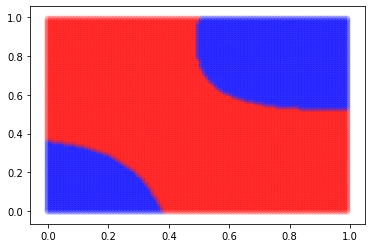

In [42]:
h = model.predict_proba(grid)   #h에는 각 클래스에 대한 확률값(0~1)이 들어간다.

print(h)
print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]  #0.5가 넘으면 빨간색, 0.5 미만이면 파란색으로
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

그래프 모양은 바뀌었지만 어쨌든 예측 결과는 맞다.

(돌릴 때마다 그래프 모양 달라짐)

## 2-3. 모델 갖고 놀기

## 2-3-1. 층 늘리기

In [55]:
#엄청나게 깊게 만들어보자

model = Sequential()
model.add(Dense(10, input_dim = 2))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(5))
model.add(Activation('sigmoid'))

model.add(Dense(3)) 
model.add(Activation('sigmoid'))

model.add(Dense(1))    #output layer
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

model.fit(X, y, batch_size=4, epochs=4000, verbose=0) 

print(model.predict(X))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_61 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_62 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_63 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 10)              

(10000, 2)
[[0.   0.  ]
 [0.   0.01]
 [0.   0.02]
 ...
 [0.99 0.97]
 [0.99 0.98]
 [0.99 0.99]]
[[0.01034054]
 [0.01034114]
 [0.01034187]
 ...
 [0.6661252 ]
 [0.6661252 ]
 [0.6661252 ]]
<class 'numpy.ndarray'>
(10000, 1)


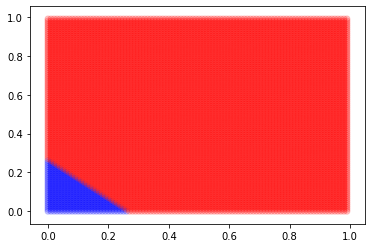

In [56]:
#분류 결과 시각화
xx, yy = np.mgrid[0:1:0.01, 0:1:0.01]   #mgrid: messy grid를 그려줌; 시작값:끝값:단위
#xx에는 x좌표만, yy에는 y좌표만; 둘다 2차원 배열임
grid = np.c_[xx.flatten(), yy.flatten()]   #np.c_[]: 두개의 1차원배열을 세로로 붙여서 2차원배열로 만든다.
print(grid.shape)
print(grid)

h = model.predict_proba(grid)   #h에는 각 클래스에 대한 확률값(0~1)이 들어간다.

print(h)
print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]  #0.5가 넘으면 빨간색, 0.5 미만이면 파란색으로
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

### 다른 데이터로 

(500,)


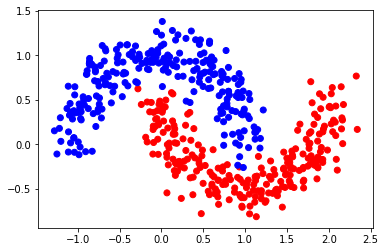

In [2]:
#학습을 위해서 데이터 만들기
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

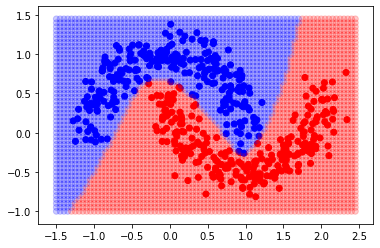

In [8]:
#1. 모델 생성
model = Sequential([                                #이렇게도 할 수 있다; 굳이 `add`를 안 써도 됨
    Dense(5, activation = 'sigmoid', input_dim = 2),
    Dense(5, activation = 'sigmoid'),
    Dense(1, activation = 'sigmoid')
])                                           

#2. 모델 완성: loss와 optimizer 지정
model.compile(loss = 'binary_crossentropy', optimizer = Adam(0.01))

#3. 모델 학습
model.fit(x_data, y_data, batch_size = 100, epochs = 3000, verbose = 0, validation_data = (x_data, y_data))


#4. 결정경계면 그리기
colors = ["red"  if i == 1  else  "blue"  for i  in y_data  ]      #실제 데이터
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)

xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]      #배경
grid = np.c_[xx.flatten(), yy.flatten()]

h = model.predict_proba(grid)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ] 
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

## 2-3-1. 층 늘리기

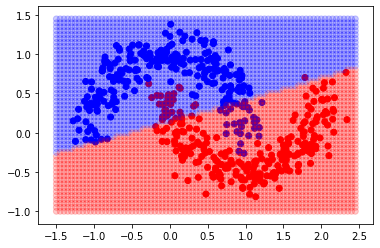

In [9]:
#1. 모델 생성
model = Sequential([                                #이렇게도 할 수 있다; 굳이 `add`를 안 써도 됨
    Dense(5, activation = 'sigmoid', input_dim = 2),
    Dense(5, activation = 'sigmoid'),
    Dense(5, activation = 'sigmoid'),
    Dense(5, activation = 'sigmoid'),
    Dense(5, activation = 'sigmoid'),
    Dense(5, activation = 'sigmoid'),
    Dense(5, activation = 'sigmoid'),
    Dense(1, activation = 'sigmoid')
])                                           

#2. 모델 완성: loss와 optimizer 지정
model.compile(loss = 'binary_crossentropy', optimizer = Adam(0.01))

#3. 모델 학습
model.fit(x_data, y_data, batch_size = 100, epochs = 3000, verbose = 0, validation_data = (x_data, y_data))


#4. 결정경계면 그리기
colors = ["red"  if i == 1  else  "blue"  for i  in y_data  ]      #실제 데이터
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)

xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]      #배경
grid = np.c_[xx.flatten(), yy.flatten()]

h = model.predict_proba(grid)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ] 
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

## 2-3-1. 뉴런 수 늘리기

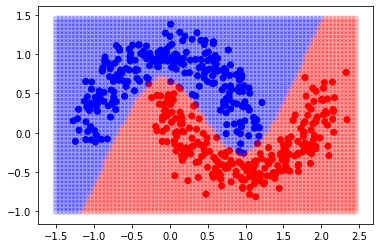

In [11]:
#1. 모델 생성
model = Sequential([                                #이렇게도 할 수 있다; 굳이 `add`를 안 써도 됨
    Dense(5, activation = 'sigmoid', input_dim = 2),
    Dense(5, activation = 'sigmoid'),
    Dense(5, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(1, activation = 'sigmoid')
])                                           

#2. 모델 완성: loss와 optimizer 지정
model.compile(loss = 'binary_crossentropy', optimizer = "adam")

#3. 모델 학습
model.fit(x_data, y_data, batch_size = 100, epochs = 3000, verbose = 1, validation_data = (x_data, y_data))

#verbose: 0: 출력 안함; 1: 출력

#4. 결정경계면 그리기
colors = ["red"  if i == 1  else  "blue"  for i  in y_data  ]      #실제 데이터
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)

xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]      #배경
grid = np.c_[xx.flatten(), yy.flatten()]

h = model.predict_proba(grid)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ] 
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

학습이 안되어야 하는 데 된다.

# 학습이 잘 되고 있는지 확인할 길이 없다. --> 있다.

1. from keras.callbacks import LambdaCallback
    - 학습 잘하고 있는지 찔러보기1: 특정 epoch마다만 verbose 출력
2. from keras.callbacks import EarlyStopping
    - 학습 잘하고 있는지 찔러보기2: 특정 변화량 미만이면 학습 조기 종료

미리 함수를 정의해두면 편리하게 활용할 수 있다.

In [14]:
def lambdaf_(epoch, logs, step):
    if epoch % step == 0: print(f"{epoch} => {logs}")
    
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

In [16]:
model = Sequential([
    Dense(5, activation = 'sigmoid', input_dim = 2),
    Dense(5, activation = 'sigmoid'),
    Dense(5, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(1, activation = 'sigmoid')
])                                           

model.compile(loss = 'binary_crossentropy', optimizer = "adam")

model.fit(x_data, y_data, batch_size = 100, epochs = 3000, verbose = 0,   #사용자가 정의할 것이기 때문에 verbose = 0으로 지정
          validation_data = (x_data, y_data),
         callbacks = [printepoch(500)]       #callback은 epoch 당 2회 호출됨; 돌기 전 1회, 돌고 나서 1회
         )


0 => {'val_loss': 0.7676618933677674, 'loss': 0.7739258885383606}
500 => {'val_loss': 0.4407562553882599, 'loss': 0.44764427542686464}
1000 => {'val_loss': 0.34336255192756654, 'loss': 0.3435800075531006}
1500 => {'val_loss': 0.03076983392238617, 'loss': 0.03149021826684475}
2000 => {'val_loss': 0.0155275734141469, 'loss': 0.01791895618662238}
2500 => {'val_loss': 0.015028573083691299, 'loss': 0.01587081968318671}


accuracy까지 출력하고 싶으면 `compile` 메소드 활용 시 metrics 인자에 ['accuracy']를 전달하면 된다.

log 값은 `compile`과 `fit`메소드에 전달하는 인자에 따라 달라지기 때문
- model.compile(..., metrics = ['accuracy']): ==> log에 'accuracy', 'val_accuracy' 포함됨
- model.fit(..., validation_data = (, )): ==> log에 'val_loss', 'val_accuracy' 포함됨

In [20]:
model = Sequential([
    Dense(5, activation = 'sigmoid', input_dim = 2),
    Dense(5, activation = 'sigmoid'),
    Dense(5, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(1, activation = 'sigmoid')
])                                           

model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

model.fit(x_data, y_data, batch_size = 200, epochs = 1000, verbose = 0,   #사용자가 정의할 것이기 때문에 verbose = 0으로 지정
          validation_data = (x_data, y_data),
         callbacks = [printepoch(200)]       #callback은 epoch 당 2회 호출됨; 돌기 전 1회, 돌고 나서 1회
         )


0 => {'val_loss': 0.6966760277748107, 'val_accuracy': 0.5, 'loss': 0.6976533532142639, 'accuracy': 0.5}
200 => {'val_loss': 0.6931625366210937, 'val_accuracy': 0.5, 'loss': 0.6931718230247498, 'accuracy': 0.5}
400 => {'val_loss': 0.6931526899337769, 'val_accuracy': 0.5, 'loss': 0.6932007074356079, 'accuracy': 0.5}
600 => {'val_loss': 0.3630673110485077, 'val_accuracy': 0.8799999952316284, 'loss': 0.3635924160480499, 'accuracy': 0.88}
800 => {'val_loss': 0.3405979752540588, 'val_accuracy': 0.8740000128746033, 'loss': 0.340770548582077, 'accuracy': 0.874}


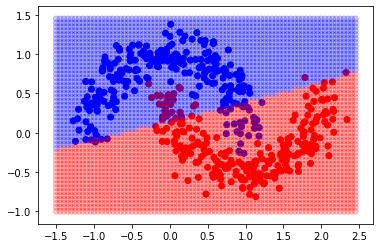

In [21]:
colors = ["red"  if i == 1  else  "blue"  for i  in y_data  ]      #실제 데이터
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)

xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]      #배경
grid = np.c_[xx.flatten(), yy.flatten()]

h = model.predict_proba(grid)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ] 
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

부정확한 부분이 없지 않다.

0 => {'val_loss': 0.7249026656150818, 'val_accuracy': 0.5, 'loss': 0.7280694484710694, 'accuracy': 0.5}
200 => {'val_loss': 0.6931711554527282, 'val_accuracy': 0.5, 'loss': 0.693192183971405, 'accuracy': 0.5}
400 => {'val_loss': 0.6931993842124939, 'val_accuracy': 0.5, 'loss': 0.693259084224701, 'accuracy': 0.5}
600 => {'val_loss': 0.4788162350654602, 'val_accuracy': 0.878000020980835, 'loss': 0.4871129810810089, 'accuracy': 0.878}
800 => {'val_loss': 0.36031582951545715, 'val_accuracy': 0.8820000290870667, 'loss': 0.36076983213424685, 'accuracy': 0.882}
1000 => {'val_loss': 0.35483185648918153, 'val_accuracy': 0.8820000290870667, 'loss': 0.3548350214958191, 'accuracy': 0.882}
1200 => {'val_loss': 0.33532081842422484, 'val_accuracy': 0.8740000128746033, 'loss': 0.3354720056056976, 'accuracy': 0.874}
1400 => {'val_loss': 0.3074420988559723, 'val_accuracy': 0.8700000047683716, 'loss': 0.30756859183311464, 'accuracy': 0.868}
1600 => {'val_loss': 0.2851512134075165, 'val_accuracy': 0.86799

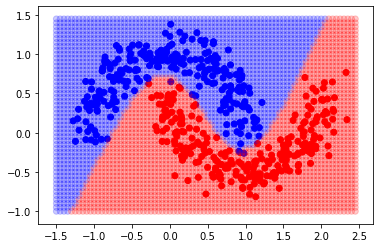

In [22]:
#epoch 수를 늘리면 좀 더 잘 분류될까?
model = Sequential([
    Dense(5, activation = 'sigmoid', input_dim = 2),
    Dense(5, activation = 'sigmoid'),
    Dense(5, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(1, activation = 'sigmoid')
])                                           

model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

model.fit(x_data, y_data, batch_size = 200, epochs = 3000, verbose = 0,   #사용자가 정의할 것이기 때문에 verbose = 0으로 지정
          validation_data = (x_data, y_data),
         callbacks = [printepoch(200)]       #callback은 epoch 당 2회 호출됨; 돌기 전 1회, 돌고 나서 1회
         )

colors = ["red"  if i == 1  else  "blue"  for i  in y_data  ]      #실제 데이터
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)

xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]      #배경
grid = np.c_[xx.flatten(), yy.flatten()]

h = model.predict_proba(grid)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ] 
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

좀 헤매다가 막판에 가서 accuracy가 확 높아졌다.

## 2-4. 활성화 함수

## 다른 활성화 함수를 써보자: LeakyReLU

<img src=activation_functions.jpg>

- sigmoid와 relu의 가장 큰 차이는
    - sigmoid는 수렴
    - relu는 발산: -무한대 ~ + 무한대
    
- LeakyReLU는 0 미만의 값에 기울기가 있는 것
    - alpha 인자에 기울기 값을 지정할 수 있다.
        - e.g. LeakyReLU(alpha = 0.1)

0 => {'val_loss': 0.6803267121315002, 'val_accuracy': 0.7200000286102295, 'loss': 0.6887487530708313, 'accuracy': 0.53}
500 => {'val_loss': 0.007366301398724318, 'val_accuracy': 0.9959999918937683, 'loss': 0.007902610185556113, 'accuracy': 0.996}
1000 => {'val_loss': 0.004216703525162302, 'val_accuracy': 1.0, 'loss': 0.004444880917435512, 'accuracy': 0.998}
1500 => {'val_loss': 0.0032691760679881554, 'val_accuracy': 1.0, 'loss': 0.003775778625276871, 'accuracy': 0.998}
2000 => {'val_loss': 0.0029086287987865945, 'val_accuracy': 1.0, 'loss': 0.003183965346579498, 'accuracy': 1.0}
2500 => {'val_loss': 0.0022984108727087003, 'val_accuracy': 1.0, 'loss': 0.002793801938969409, 'accuracy': 0.998}


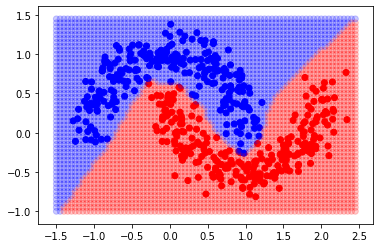

In [27]:
model = Sequential([
    Dense(5, activation = LeakyReLU(alpha = 0.1), input_dim = 2),    #편의를 위해서 층으로 묶어서 썼는데, CNN에서는 문제가 생길 수 있다; 원래 활성화 함수는 따로 써줘야 함
    Dense(10, activation = LeakyReLU(alpha = 0.1)),
    Dense(10, activation = LeakyReLU(alpha = 0.1)),
    Dense(10, activation = LeakyReLU(alpha = 0.1)),
    Dense(1, activation = 'sigmoid'),
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(x_data, y_data, batch_size = 100, epochs = 3000, verbose = 0, validation_data = (x_data, y_data), callbacks = [printepoch(500)])

colors = ["red"  if i == 1  else  "blue"  for i  in y_data  ]      #실제 데이터
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)

xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]      #배경
grid = np.c_[xx.flatten(), yy.flatten()]

h = model.predict_proba(grid)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ] 
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

500 epoch 만에 accuracy가 껑충 뛰었다.

sigmoid에 비하면 엄청난 성능임을 확인할 수 있다.

#### 모델의 깊이가 깊어질수록 활성화 함수의 중요도가 높아진다.

# 3. 경사하강법 

## 왜 활성화 함수에 따라 성능이 달라질까?

<img src=back_propagation_formula.jpg>

- sigmoid 함수
    - 미분값이 0이 아닌 값의 범위가 굉장히 협소하다.
        - 0이 많기 때문에 w값이 잘 업데이트되지 않는다. + 기울기 소실 문제가 발생한다.
        - w_ = w + 0
        - w_ == w
    - 뫄뫄뫄를 합성해서 계산하기 때문에 계산량이 많다 == 느리다.
- relu 함수
    - 미분값이 0이 아닌 값이 더 많다.
        - 0이 많이 없기 때문에 w값이 잘 업데이트된다. + 기울기 소실 문제가 덜하다.
        - w_ = w + 0이 아닌 값
        - w_ != w
    - 미분값이 1 아니면 alpha 값이기 때문에 계산량이 적다 == 빠르다.
    
## 오차계산법
- 모델의 성능을 계산하기 위해서는 모델의 예측값에 대한 오차를 계산해야 한다.
    - 오차가 작을수록 성능이 좋은 모델
    - cost(loss) 함수를 통해서 오차를 계산한다
    

1. 평균 절대 오차 (MAE)
2. 평균 제곱 오차 (MSE)
3. **평균 제곱근 오차** (RMSE): 비용함수를 미분할 수 있어야 하기 때문에 제곱함수여야 함 (절대 함수 안됨)

<img src=error.jpg>

--> **경사하강법**으로 평균 제곱근 오차가 최소가 되는 지점을 찾는다.

<img src=gd.jpg>

부록) 예전에 sigmoid 함수를 쓴 이유
- 출력값이 0~1 사이의 값 --> 분류에 적용하기 용이
- 0, 1로 분류하는 step 함수에 비해 변화 구간이 부드러움 --> 미분 가능

In [28]:
#모델 만드는 함수 정의 (반복 실험을 할 때 유용하게 활용할 수 있다)
def createModel(layers, activation, input_dim):
    model = Sequential()
    d = layers.pop(0)
    model.add(Dense(d, activation = activation, input_dim = input_dim))
    for l in layers:
        model.add(Dense(1, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))    #마지막 층은 따로 지정
    return model

model = createModel([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
                   LeakyReLU(alpha = 0.1), 2)

C:\Users\student\Anaconda3\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
